## Predict students' dropout and academic success
### A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters.

https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

In [3]:
student_dropout = pd.read_csv('data.csv', sep=';')
student_dropout


#svm 
#deep learnin
#auto-encoder, supervised methods, principal component analysis
# determine which column is the biggest factor on dropout rate

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Cleaning
#### The data cleaning process is performed by the 4 creators of this dataset, which are Valentino Realinho, Mónica Vieira Martins, Jorge Machado, Luís Baptista.
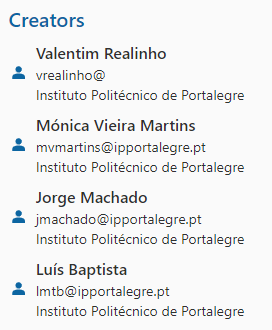
#### A thorough data prepocessing has been performed by them to handle anomalies, unexplanable outliers and missing values. Therefore, the data cleaning process is already done by the creators.

In [4]:
# Spell checking
student_dropout.rename(columns={"Nacionality":"Nationality", "Daytime/evening attendance\t":"Daytime/Evening attendance"})

,Marital status,Application mode,Application order,Course,Daytime/Evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Selection
#### I explored several websites to understand which aspects might have a stronger influence on the outcome. After going through these sources, I formed a hypothesis about which features could be more important compared to others.

Here are a few of my conclusion after reading form the sources I found:
- Grades
- Unemployment rate
- Course

<p>
Realizing that my own conclusion or idea might not be completely unbiased, I chose to use a random forest analysis to figure out which features are more important.</p>

**Sources:**
1. https://www.hindawi.com/journals/edri/2023/7704142/#conclusion-and-limitations
2. https://www.frontiersin.org/articles/10.3389/feduc.2023.1159864/full


#### Random Forest Classifier
The code utilizes the RandomForestClassifier from scikit-learn to analyze feature importances within the studentDropout dataset.Here I chose the top 15 highest features in the result.
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Sepearate predictors (X) and target variable (y)
X = student_dropout.drop(columns='Target')
y = student_dropout['Target']

rf = RandomForestClassifier().fit(X,y)

# get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# get top 15
feature_importances = feature_importances.head(15)
print(feature_importances)

# filter out columns that are not in the top 15 in the student_dropout dataset
columns_filtered = feature_importances['Feature'].tolist()
columns_filtered.append('Target')
student_dropout_top15 = student_dropout[columns_filtered]
student_dropout_top15

                                   Feature  Importance
30     Curricular units 2nd sem (approved)    0.156579
31        Curricular units 2nd sem (grade)    0.098618
24     Curricular units 1st sem (approved)    0.084711
25        Curricular units 1st sem (grade)    0.068559
16                 Tuition fees up to date    0.044170
12                         Admission grade    0.042612
29  Curricular units 2nd sem (evaluations)    0.037838
6           Previous qualification (grade)    0.037242
19                       Age at enrollment    0.035915
23  Curricular units 1st sem (evaluations)    0.034955
3                                   Course    0.033675
11                     Father's occupation    0.027955
10                     Mother's occupation    0.025816
35                                     GDP    0.022976
9                   Father's qualification    0.022362


,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Tuition fees up to date,Admission grade,Curricular units 2nd sem (evaluations),Previous qualification (grade),Age at enrollment,Curricular units 1st sem (evaluations),Course,Father's occupation,Mother's occupation,GDP,Father's qualification,Target
0,0,0.000000,0,0.000000,1,127.3,0,122.0,20,0,171,9,5,1.74,12,Dropout
1,6,13.666667,6,14.000000,0,142.5,6,160.0,19,6,9254,3,3,0.79,3,Graduate
2,0,0.000000,0,0.000000,0,124.8,0,122.0,19,0,9070,9,9,1.74,37,Dropout
3,5,12.400000,6,13.428571,1,119.6,10,122.0,20,8,9773,3,5,-3.12,37,Graduate
4,6,13.000000,5,12.333333,1,141.5,6,100.0,45,9,8014,9,9,0.79,38,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,5,12.666667,5,13.600000,1,122.2,8,125.0,19,7,9773,4,5,-4.06,1,Graduate
4420,2,11.000000,6,12.000000,0,119.0,6,120.0,18,6,9773,9,9,2.02,1,Dropout
4421,1,13.500000,7,14.912500,1,149.5,9,154.0,30,8,9500,9,9,0.79,37,Dropout
4422,5,12.000000,5,13.800000,1,153.8,6,180.0,20,5,9147,4,7,-3.12,37,Graduate


##### A data visualization for feature importance
I plotted a feature importance graph against the target variable (Academic success/Dropout) to improve visualization 

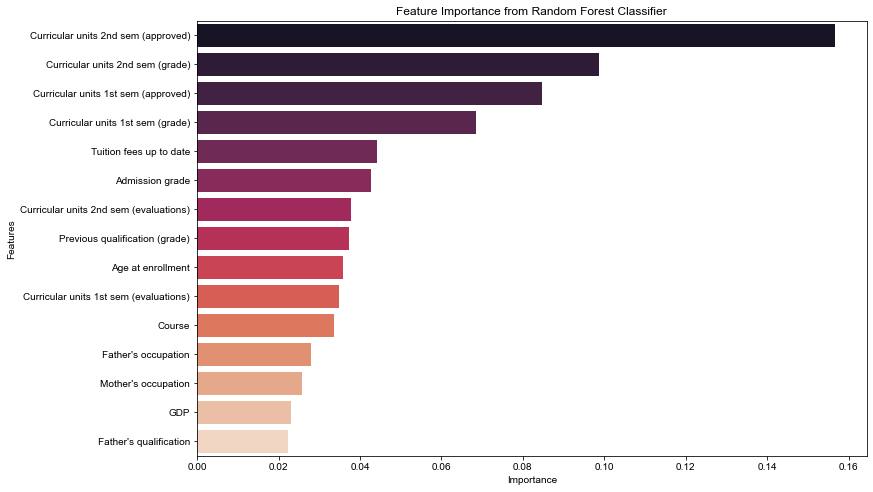

In [6]:
plt.figure(figsize=(12, 8))

# Create a bar plot using Seaborn
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='rocket')

# Set labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest Classifier')

plt.show()

## Data Transformation
#### After carefully weighing the complexity and dimensionality of the data, I chose label encoding for the target column as it is categorical (Graduate/Dropout). I decided against using one-hot encoding because it would make the data much more complex, creating a lot of new columns, which could make it tough to analyze and find patterns during data mining.

**Sources:**
1. https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/#:~:text=Label%20encoding%20is%20simpler%20and,lead%20to%20high%2Ddimensional%20data.
2. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
 

In [7]:
from sklearn.preprocessing import LabelEncoder

X = student_dropout_top15.drop(columns='Target')
y = student_dropout_top15['Target']

# perform label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# show numeric representation
label_categories = label_encoder.classes_
print(label_categories)

['Dropout' 'Enrolled' 'Graduate']


#### Train Test Split
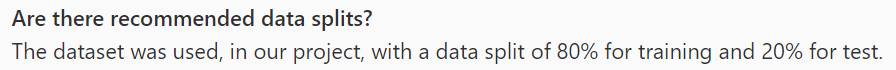<br>
It was reccommended by the creators that train test split should be 2:8

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Data Mining
##### I planned to use two techniques to determine which algorithm/method has more accuracy.
- Decision Tree Classifier
- Support Vector Machine(SVM)

#### Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy: ", dt_accuracy)

Decision Tree Accuracy:  0.6870056497175141


#### Support Vector Machine

In [10]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM without PCA Accuracy:", svm_accuracy)

SVM without PCA Accuracy: 0.7435028248587571


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(rf_accuracy)

0.7661016949152543


Confusion Matrix for SVM without PCA:
[[202  30  42]
 [ 43  41  83]
 [ 14  15 415]]
